In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.shape

(159571, 8)

In [5]:
test.shape

(153164, 2)

In [6]:
train['id'].nunique()

159571

In [7]:
test['id'].nunique()

153164

In [8]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [9]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [10]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
train['comment_text'].nunique()

159571

In [12]:
test['comment_text'].nunique()

153164

In [13]:
train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [14]:
test.isnull().sum()

id              0
comment_text    0
dtype: int64

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


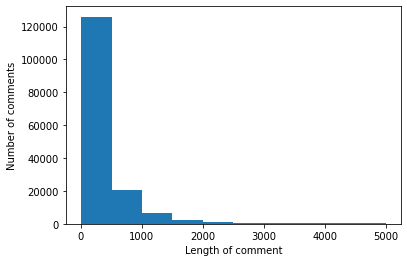

In [16]:
l = train['comment_text'].str.len()
plt.hist(l)
plt.xlabel('Length of comment')
plt.ylabel('Number of comments')
plt.show()

In [17]:
df_train = train.copy()
df_test = test.copy()

## Preprocessing

In [18]:
df_train['comment_text'] = df_train['comment_text'].str.lower()

In [19]:
df_test['comment_text'] = df_test['comment_text'].str.lower()

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [21]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [22]:
df_train['comment_text'] = df_train['comment_text'].apply(cleanHtml)
df_train['comment_text'] = df_train['comment_text'].apply(cleanPunc)
df_train['comment_text'] = df_train['comment_text'].apply(keepAlpha)
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really not trying to edit war its j...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i cant make any real suggestions on impro...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0


In [23]:
df_test['comment_text'] = df_test['comment_text'].apply(cleanHtml)
df_test['comment_text'] = df_test['comment_text'].apply(cleanPunc)
df_test['comment_text'] = df_test['comment_text'].apply(keepAlpha)
df_test.head()

,id,comment_text
0,00001cee341fdb12,yo bitch ja rule is more succesful then youll ...
1,0000247867823ef7,from rfc the title is fine as it is imo
2,00013b17ad220c46,sources zawe ashton on lapland
3,00017563c3f7919a,if you have a look back at the source the info...
4,00017695ad8997eb,i dont anonymously edit articles at all


## Remove Stopwords

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Bhavana
[nltk_data]     Padala\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

df_train['comment_text'] = df_train['comment_text'].apply(removeStopWords)
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation edits made username hardcore m...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww matches background colour im seemingly ...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really trying edit war guy c...,0,0,0,0,0,0
3,0001b41b1c6bb37e,cant make real suggestions improvement ...,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chance remember page thats on,0,0,0,0,0,0


In [26]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

df_test['comment_text'] = df_test['comment_text'].apply(removeStopWords)
df_test.head()

,id,comment_text
0,00001cee341fdb12,yo bitch ja rule succesful youll ever what...
1,0000247867823ef7,rfc title fine imo
2,00013b17ad220c46,sources zawe ashton lapland
3,00017563c3f7919a,look back source information updated ...
4,00017695ad8997eb,dont anonymously edit articles all


## Stemming

In [27]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

df_train['comment_text'] = df_train['comment_text'].apply(stemming)
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explan edit made usernam hardcor metallica fan...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww match background colour im seem stuck tha...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im realli tri edit war guy constant re...,0,0,0,0,0,0
3,0001b41b1c6bb37e,cant make real suggest improv wonder section s...,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chanc rememb page that on,0,0,0,0,0,0


In [28]:
df_test['comment_text'] = df_test['comment_text'].apply(stemming)
df_test.head()

,id,comment_text
0,00001cee341fdb12,yo bitch ja rule succes youll ever what hate s...
1,0000247867823ef7,rfc titl fine imo
2,00013b17ad220c46,sourc zaw ashton lapland
3,00017563c3f7919a,look back sourc inform updat correct form gues...
4,00017695ad8997eb,dont anonym edit articl all


In [29]:
df_train_1 = df_train.copy()
df_train_1.to_csv('cleaned_data.csv')

In [34]:
labels = ['obscene','insult','toxic','severe_toxic','identity_hate','threat']

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train['comment_text'], df_train[labels], test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(127656,)
(127656, 6)
(31915,)
(31915, 6)


In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = vect_word = TfidfVectorizer( lowercase=True, analyzer='word',stop_words= 'english',ngram_range=(1,1),dtype=np.float32)
x_dtm = vect.fit_transform(X_train) 
test_dtm = vect.transform(X_test)
x_test_dtm = vect.transform(df_test['comment_text'])

In [76]:
test_dtm.shape

(31915, 165470)

In [77]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
lr = LogisticRegression(C=3.5,solver = 'sag')
sub = {}
bud = {}
for label in labels:
    y = y_train[label]
    lr.fit(x_dtm,y)
    y_pred_x = lr.predict(test_dtm)
    bud[label] = y_pred_x
    y_prob = lr.predict_proba(test_dtm)[:,1]
    sub[label]= y_prob
    print(accuracy_score(y_test[label], y_pred_x))
print(pd.DataFrame(bud))

0.9785054049819834
0.9708914303618988
0.9595174682751058
0.9906000313332289
0.9917593608021307
0.9976500078333073
       obscene  insult  toxic  severe_toxic  identity_hate  threat
0            0       0      0             0              0       0
1            0       0      0             0              0       0
2            0       0      0             0              0       0
3            0       0      0             0              0       0
4            0       0      0             0              0       0
...        ...     ...    ...           ...            ...     ...
31910        0       0      1             0              0       0
31911        0       0      0             0              0       0
31912        0       0      0             0              0       0
31913        0       1      1             0              0       0
31914        0       0      0             0              0       0

[31915 rows x 6 columns]


In [80]:
sub = {}
bud = {}
for label in labels:
    y = y_train[label]
    lr.fit(x_dtm,y)
    y_pred_x = lr.predict(x_test_dtm)
    bud[label] = y_pred_x
    y_prob = lr.predict_proba(x_test_dtm)[:,1]
    sub[label]= y_prob
t = pd.DataFrame(sub)
print(t)

         obscene    insult     toxic  severe_toxic  identity_hate    threat
0       0.998086  0.918846  0.999073      0.111488       0.220229  0.026806
1       0.002350  0.003594  0.004591      0.001375       0.001769  0.001196
2       0.011332  0.015371  0.031663      0.002861       0.003453  0.001128
3       0.001671  0.001295  0.001484      0.001557       0.000302  0.000737
4       0.009866  0.013728  0.032750      0.002549       0.005244  0.001525
...          ...       ...       ...           ...            ...       ...
153159  0.176009  0.025018  0.742631      0.003012       0.003113  0.001888
153160  0.015394  0.023788  0.044708      0.003578       0.011084  0.004047
153161  0.004408  0.004688  0.009105      0.001768       0.000593  0.000802
153162  0.015417  0.014365  0.021106      0.001402       0.013834  0.002627
153163  0.910321  0.356224  0.993269      0.002458       0.009695  0.007722

[153164 rows x 6 columns]


In [97]:
sub = pd.concat([df_test['id'], t],axis = 1)
sub

,id,obscene,insult,toxic,severe_toxic,identity_hate,threat
0,00001cee341fdb12,0.998086,0.918846,0.999073,0.111488,0.220229,0.026806
1,0000247867823ef7,0.002350,0.003594,0.004591,0.001375,0.001769,0.001196
2,00013b17ad220c46,0.011332,0.015371,0.031663,0.002861,0.003453,0.001128
3,00017563c3f7919a,0.001671,0.001295,0.001484,0.001557,0.000302,0.000737
4,00017695ad8997eb,0.009866,0.013728,0.032750,0.002549,0.005244,0.001525
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.176009,0.025018,0.742631,0.003012,0.003113,0.001888
153160,fffd7a9a6eb32c16,0.015394,0.023788,0.044708,0.003578,0.011084,0.004047
153161,fffda9e8d6fafa9e,0.004408,0.004688,0.009105,0.001768,0.000593,0.000802
153162,fffe8f1340a79fc2,0.015417,0.014365,0.021106,0.001402,0.013834,0.002627


In [98]:
sub.to_csv('submission.csv')